```{contents}
```
# Word Embeddings

**Word embeddings** are a way to **represent words as numerical vectors** in such a way that **similar words have similar representations**. This allows machine learning models to process text efficiently.

Unlike simple representations like **Bag of Words (BoW)** or **TF-IDF**, embeddings capture **semantic meaning and relationships** between words.

---

## **1. Why do we need embeddings?**

Traditional representations:

* **Bag of Words (BoW)** → high-dimensional, sparse, ignores word order, semantic meaning lost.
* **TF-IDF** → weighs words by importance, but still sparse and does not capture meaning.

**Problem example:**

> "King" and "Queen" are related concepts, but BoW or TF-IDF treat them as completely independent.

Embeddings solve this by mapping words to a **dense vector space** where relationships are preserved.

---

## **2. How embeddings work**

* Each word is represented as a **dense vector of fixed size** (e.g., 100, 300 dimensions).
* Similar words have **vectors close together** in this space.

**Example:**

Suppose we have embeddings:

```
King → [0.5, 0.1, 0.3, ...]
Queen → [0.49, 0.12, 0.33, ...]
Man → [0.48, 0.05, 0.2, ...]
Woman → [0.47, 0.09, 0.31, ...]
```

We notice:

* `King` and `Queen` vectors are close → semantically related.
* `Man` and `Woman` vectors are also close → semantic gender relation.

**Cool property:** We can do vector arithmetic:

$$
\text{King} - \text{Man} + \text{Woman} \approx \text{Queen}
$$

---

## **3. How embeddings are learned**

Word embeddings can be learned using **unsupervised neural network methods**:

1. **Word2Vec (Google)**

   * **CBOW (Continuous Bag of Words)** → predicts a word from surrounding context.
   * **Skip-gram** → predicts surrounding words from a given word.

2. **GloVe (Stanford)**

   * Uses **word co-occurrence matrix** → captures global statistical information from corpus.

3. **FastText (Facebook)**

   * Considers **subword information** → handles rare and out-of-vocabulary words better.

4. **Contextual embeddings (modern)**

   * **ELMo, BERT, GPT** → embeddings depend on **sentence context**, not just the word itself.

---

## **4. Advantages of word embeddings**

* Dense, low-dimensional vectors → more memory-efficient than BoW.
* Captures **semantic similarity**.
* Allows **vector arithmetic** to capture relationships.
* Works as input to deep learning models for NLP tasks (classification, translation, etc.).

---

## **5. Example intuition**

Consider the sentence:

> “I love playing football with my friends.”

* BoW/TF-IDF → `[I, love, playing, football, friends]` → sparse, no relationship between words.
* Word embeddings → each word → 300-d vector → words like `football` and `soccer` are close → model understands meaning.

In [4]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Sample corpus
corpus = [
    "I love playing football with my friends",
    "Soccer is a popular sport worldwide",
    "I enjoy watching football matches on TV",
    "My friends and I often play soccer in the park",
    "Basketball is another fun sport to play"
]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=3, min_count=1, sg=1)

# Check vocabulary
print("Vocabulary:", list(model.wv.index_to_key))

# Find similar words
print("\nWords similar to 'football':")
print(model.wv.most_similar('football', topn=5))

# Vector of a word
football_vector = model.wv['football']
print("\nVector for 'football':")
print(football_vector)

# Vector arithmetic: 'king' analogy example with soccer/football corpus
# Since our corpus is small, let's just try a small analogy example
# Example: 'football' - 'soccer' (they are similar, result should be close to zero vector)
vector_diff = model.wv['football'] - model.wv['soccer']
print("\nVector difference (football - soccer):")
print(vector_diff)

[nltk_data] Downloading package punkt to c:\Users\sangouda\AppData\Loc
[nltk_data]     al\Programs\Python\Python312\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary: ['i', 'football', 'my', 'play', 'friends', 'soccer', 'is', 'sport', 'worldwide', 'love', 'playing', 'with', 'a', 'popular', 'to', 'fun', 'watching', 'matches', 'on', 'tv', 'and', 'often', 'in', 'the', 'park', 'basketball', 'another', 'enjoy']

Words similar to 'football':
[('watching', 0.22991527616977692), ('basketball', 0.21914270520210266), ('tv', 0.16105233132839203), ('on', 0.14879365265369415), ('friends', 0.12484795600175858)]

Vector for 'football':
[-0.01631564  0.00899461 -0.00826983  0.00165304  0.0169992  -0.00893285
  0.00903441 -0.01356917 -0.00709783  0.01879298 -0.00315031  0.00064065
 -0.00826994 -0.0153637  -0.00301724  0.00494343 -0.00177434  0.01106402
 -0.00548547  0.00451673  0.01090772  0.01669349 -0.0029049  -0.01842441
  0.00874417  0.0011439   0.01488192 -0.001628   -0.00527003 -0.01750883
 -0.00170764  0.00564735  0.01080873  0.01411702 -0.01139951  0.0037221
  0.01218007 -0.0095953  -0.00620875  0.01360093  0.00326265  0.00038593
  0.00694172  0.

## Word2Vec

---

### **1. The Core Idea**

Word2Vec is about capturing the **meaning of words based on context**.
The intuition is:

> *"Words that appear in similar contexts tend to have similar meanings."*

For example:

* Sentences:

  1. “I love playing **football**.”
  2. “I enjoy watching **soccer** matches.”

Here, **football** and **soccer** appear in similar contexts like “play,” “watch,” “matches,” so Word2Vec will learn vectors that are close to each other for these words.

---

### **2. How it Works**

Word2Vec creates **dense vector representations** (embeddings) for words. There are two main architectures:

#### **a) CBOW (Continuous Bag of Words)**

* Predicts a **target word** given its **context words**.
* Example: Context = \[“I”, “love”, “playing”] → Predict target word = “football”.
* Learns embeddings such that words appearing in similar contexts get similar vectors.

#### **b) Skip-gram**

* Predicts **context words** given a **target word**.
* Example: Target = “football” → Predict context = \[“I”, “love”, “playing”].
* Works well for small datasets and rare words.

---

### **3. Word Meaning in Vectors**

After training, each word is a vector in a high-dimensional space.

* Words with **similar meaning** → vectors are close together.
* Words with **opposite meaning** → vectors are far apart.

Example:

```
vector("king") - vector("man") + vector("woman") ≈ vector("queen")
```

This shows that Word2Vec captures **semantic relationships**.

---

### **4. Intuition Visualization**

Imagine plotting words in 2D:

* Sports-related words: "football," "soccer," "basketball" → cluster together.
* Food-related words: "apple," "juice," "mango" → cluster together.

Word2Vec embeds words so **semantically similar words naturally cluster** in vector space.

---

### **5. Summary of Intuition**

1. Words in similar contexts have similar meanings.
2. Word2Vec uses these contexts to learn dense vectors.
3. Resulting embeddings encode semantic relationships and can be used in NLP tasks like similarity, analogy, or classification.


**Goal:** Convert words into dense vector representations that capture their **semantic meaning**.

* Example: “king” − “man” + “woman” ≈ “queen”
* These vectors capture **relationships** and **context** of words.

Word2Vec has **two main architectures**:

1. **CBOW (Continuous Bag of Words)**

   * Predicts the **target word** from its **context words**.
   * Think: “Given the surrounding words, guess the center word.”

2. **Skip-gram**

   * Predicts the **context words** from a **target word**.
   * Think: “Given a word, guess its neighbors.”

---

## **CBOW Intuition**

* Suppose we have the sentence:
  `The cat sits on the mat`
* We choose a **window size** = 2 (two words before and after target).

| Target Word | Context Words |
| ----------- | ------------- |
| cat         | The, sits     |
| sits        | cat, on       |
| on          | sits, the     |

* **Input:** Context words (`The`, `sits`)
* **Output:** Target word (`cat`)
* The model learns word vectors so that words appearing in **similar contexts** have **similar embeddings**.

**Key Idea:** CBOW smooths over a lot of context words → faster for frequent words.

---

## **CBOW Architecture (Simplified)**

1. Input: One-hot encoded vectors of **context words**.
2. Hidden layer: Learns dense embeddings (word vectors).
3. Output: Predict **target word** probabilities via **softmax**.
4. Training: Use **cross-entropy loss** to adjust embeddings.

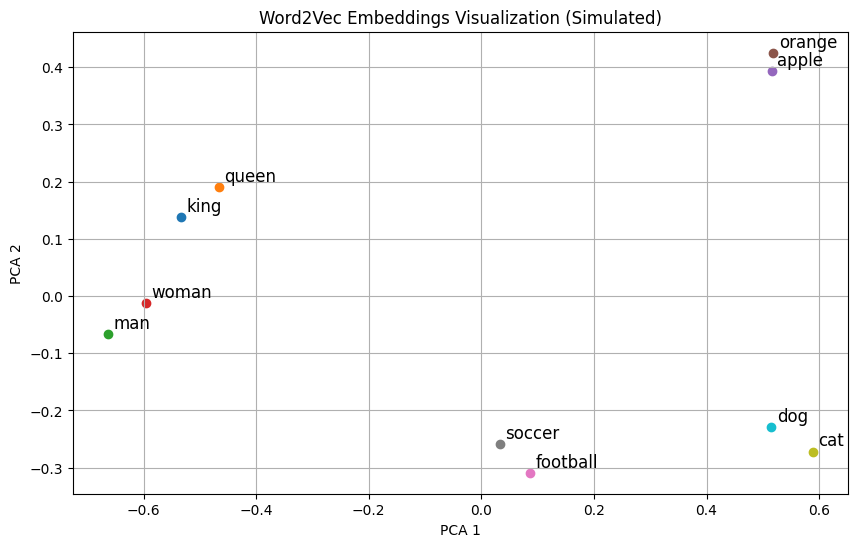

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Simulated word embeddings for demonstration
words = ["king", "queen", "man", "woman", "apple", "orange", "football", "soccer", "cat", "dog"]
embeddings = np.array([
    [0.8, 0.6, 0.1],   # king
    [0.75, 0.65, 0.15], # queen
    [0.9, 0.4, 0.0],   # man
    [0.85, 0.45, 0.05], # woman
    [0.1, 0.8, 0.9],   # apple
    [0.15, 0.85, 0.95], # orange
    [0.7, 0.2, 0.8],   # football
    [0.72, 0.25, 0.75], # soccer
    [0.05, 0.1, 0.9],  # cat
    [0.1, 0.15, 0.85]  # dog
])

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word, fontsize=12)

plt.title("Word2Vec Embeddings Visualization (Simulated)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## AvgWord2Vec

**Goal:** Represent an entire **sentence, paragraph, or document** as a **single fixed-size vector** using pre-trained word embeddings.

* Word2Vec gives you vectors **for individual words**.
* But many NLP tasks (like **text classification, clustering, sentiment analysis**) need a **single vector for a sentence or document**.

**Simple Idea:**

> Take all the word vectors in a sentence/document and **compute their average**.

Mathematically, for a sentence with words $w_1, w_2, ..., w_n$:

$$
\text{SentenceVector} = \frac{1}{n} \sum_{i=1}^{n} \text{Word2Vec}(w_i)
$$

**Why it works:**

* Words appearing together in a sentence contribute to its meaning.
* Averaging keeps the **general semantic gist** of the sentence.
* Extremely fast and simple.

---

### **Intuition with Example**

Sentence:
`"The cat sits on the mat"`

* Word vectors: `[v("the"), v("cat"), v("sits"), v("on"), v("the"), v("mat")]`
* AvgWord2Vec:

```text
SentenceVector = (v("the") + v("cat") + v("sits") + v("on") + v("the") + v("mat")) / 6
```

* This gives a **single vector** representing the sentence.
* Similar sentences will have **similar AvgWord2Vec vectors**.

---

### **Advantages and Limitations**

**Advantages:**

* Very fast and simple.
* Works surprisingly well for **semantic similarity** tasks.

**Limitations:**

* Ignores **word order** (bag-of-words effect).
* Loses **syntactic structure**.
* All words contribute equally (could use **weighted average** using TF-IDF).

---

### **Python Demonstration**

In [7]:
import numpy as np
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["the", "dog", "plays", "with", "a", "ball"]
]

# Train CBOW Word2Vec
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=0)

# Function to compute AvgWord2Vec
def avg_word2vec(sentence, model):
    vectors = [model.wv[w] for w in sentence if w in model.wv]
    return np.mean(vectors, axis=0)

# Example
sentence = ["the", "cat", "sits", "on", "the", "mat"]
sentence_vector = avg_word2vec(sentence, model)
print("AvgWord2Vec vector shape:", sentence_vector.shape)
print("First 10 dims:", sentence_vector[:10])


AvgWord2Vec vector shape: (50,)
First 10 dims: [-0.00271692  0.00514558  0.00106847 -0.00011088 -0.00594014 -0.00664723
  0.00305288  0.00911346 -0.00117141 -0.00620206]


In [6]:
# Install gensim if not already
# !pip install gensim

from gensim.models import Word2Vec

# Sample corpus (list of tokenized sentences)
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["the", "dog", "sits", "on", "the", "rug"],
    ["the", "cat", "plays", "with", "a", "ball"]
]

# Train CBOW model
model = Word2Vec(
    sentences,
    vector_size=50,  # embedding dimensions
    window=2,        # context window
    min_count=1,     # ignore words appearing less than this
    sg=0             # CBOW if sg=0, Skip-gram if sg=1
)

# Get vector for a word
cat_vector = model.wv['cat']
print("Vector for 'cat':", cat_vector[:10], "...")  # show first 10 dims

# Find similar words
similar_words = model.wv.most_similar('cat', topn=3)
print("Words similar to 'cat':", similar_words)


Vector for 'cat': [ 0.01563514 -0.01902037 -0.00041106  0.00693839 -0.00187794  0.01676354
  0.01802157  0.01307301 -0.00142324  0.01542081] ...
Words similar to 'cat': [('plays', 0.0449172779917717), ('rug', -0.010146040469408035), ('the', -0.014475265517830849)]


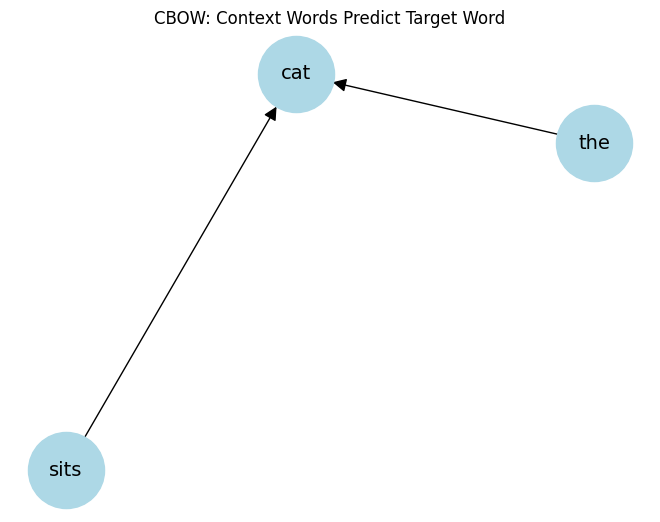

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Example: target word = 'cat', context = ['the', 'sits']
G = nx.DiGraph()
context_words = ['the', 'sits']
target_word = 'cat'

for word in context_words:
    G.add_edge(word, target_word)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=14, arrowsize=20)
plt.title("CBOW: Context Words Predict Target Word")
plt.show()


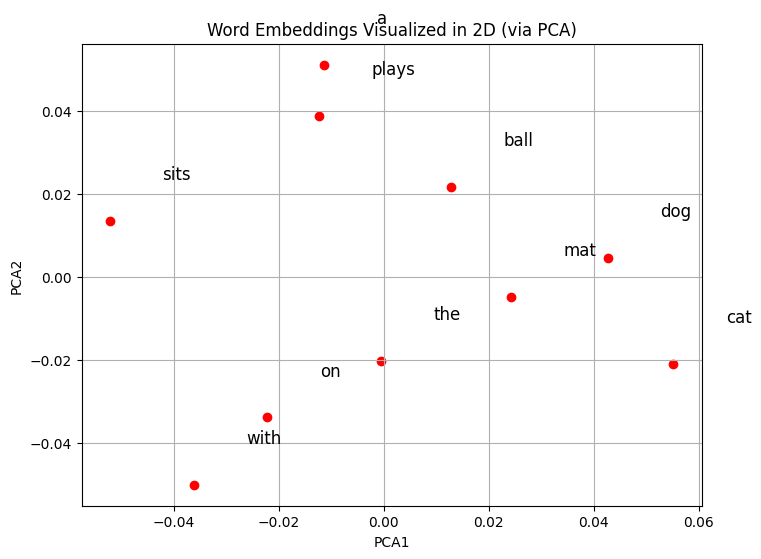

In [9]:
from sklearn.decomposition import PCA

# Extract word vectors
words = list(model.wv.index_to_key)
vectors = [model.wv[w] for w in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], color='red')

for i, word in enumerate(words):
    plt.text(vectors_2d[i,0]+0.01, vectors_2d[i,1]+0.01, word, fontsize=12)

plt.title("Word Embeddings Visualized in 2D (via PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


* You now have a **single 50-dimensional vector** representing the whole sentence.
* You can use it for **clustering, classification, similarity computation**, etc.